In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# CIFAR-10 class indices
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Select only 'Automobile' (cars: class 1) and 'Truck' (class 9)
selected_classes = [1, 9]
train_filter = np.isin(y_train, selected_classes).flatten()
test_filter = np.isin(y_test, selected_classes).flatten()

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Update labels to binary (0: Car, 1: Truck)
y_train = (y_train == 9).astype(int)
y_test = (y_test == 9).astype(int)

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
def build_binary_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Single output neuron for binary classification
    ])
    return model


In [4]:
def compile_and_train_binary_model(model, x_train, y_train, x_test, y_test, epochs=10, batch_size=64):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        x_train, y_train,
        validation_data=(x_test, y_test),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )
    return history


In [6]:
def evaluate_and_visualize_binary(model, history, x_test, y_test):
    # Evaluate the model
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Accuracy: {test_acc * 100:.2f}%")

    # Plot training history
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 85ms/step - accuracy: 0.6155 - loss: 0.6444 - val_accuracy: 0.7630 - val_loss: 0.4881
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.7829 - loss: 0.4834 - val_accuracy: 0.8415 - val_loss: 0.3694
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.8309 - loss: 0.3880 - val_accuracy: 0.8630 - val_loss: 0.3424
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.8663 - loss: 0.3198 - val_accuracy: 0.8815 - val_loss: 0.2993
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.8981 - loss: 0.2606 - val_accuracy: 0.8700 - val_loss: 0.3317
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9136 - loss: 0.2225 - val_accuracy: 0.9020 - val_loss: 0.2599
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.9277 - loss: 0.1896 - val_accuracy: 0.9030 - val_loss: 0.2485
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.9387 - loss: 0.1574 - 

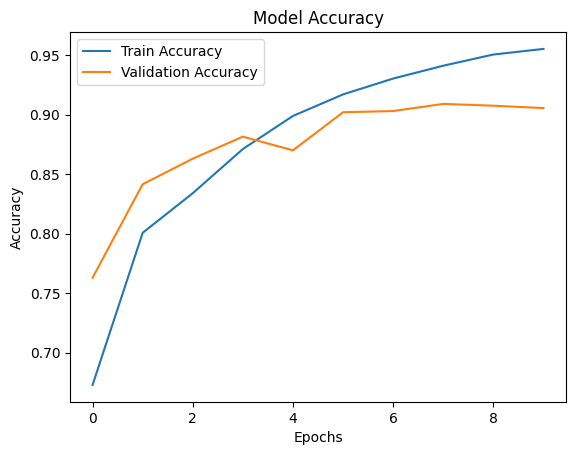

In [7]:
# Build and train the binary CNN model
binary_cnn_model = build_binary_cnn_model()
binary_cnn_history = compile_and_train_binary_model(
    binary_cnn_model, x_train, y_train, x_test, y_test, epochs=10, batch_size=64
)

# Evaluate and visualize results
evaluate_and_visualize_binary(binary_cnn_model, binary_cnn_history, x_test, y_test)
